In [1]:
import scipy
import phase_portr as pp
import math

import ipywidgets as wd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import sympy as symp
%matplotlib inline


In [2]:
#Define 
x,y, t=symp.symbols('x y t', real=True)



J = symp.Function('J')(x,y)

## Change here for new problem

In [3]:
f=y
g=-x+symp.exp(t)*y


In [4]:

def rhs(xy,t):
    xv,yv=xy
    rhs_symp=symp.lambdify((x,y,t),[f,g])
    return np.array(rhs_symp(xv,yv))


In [5]:

print('f=',f)
print('g=',g)

### Isoclines

xiso=symp.solve(f)
yiso=symp.solve(g,y)

print('f = 0 when', xiso)
print('g = 0 when y=', yiso)

### Equilibrium points
eqpnts=symp.solve([f,g],(x,y),dict=True)
print('Equilibrium points. ', eqpnts)

### Jacobian
J=symp.Matrix([f,g]).jacobian([x,y])
print('Jacobian J=',J)

J_num=symp.lambdify((x,y),J,modules='numpy') # the numerical Jacobian


f= y
g= -x + y*exp(t)
f = 0 when [0]
g = 0 when y= [x*exp(-t)]
Equilibrium points.  [{x: 0, y: 0}]
Jacobian J= Matrix([[0, 1], [-1, exp(t)]])


In [6]:
for ii in np.arange(len(eqpnts)):
    print('Eq. pnt ', ii ,' at ',eqpnts[ii])
    eigen=J.subs(eqpnts[0]).eigenvals()
    print('Eigenvalues ', eigen)
    eigen=list(eigen.items())
    print(len(eigen))
    for jj in np.arange(len(eigen)):
        print(eigen[jj][0])
    print()

Eq. pnt  0  at  {x: 0, y: 0}
Eigenvalues  {-sqrt(exp(t) - 2)*sqrt(exp(t) + 2)/2 + exp(t)/2: 1, sqrt(exp(t) - 2)*sqrt(exp(t) + 2)/2 + exp(t)/2: 1}
2
-sqrt(exp(t) - 2)*sqrt(exp(t) + 2)/2 + exp(t)/2
sqrt(exp(t) - 2)*sqrt(exp(t) + 2)/2 + exp(t)/2



In [7]:
TMP=J.subs(eqpnts[0]).eigenvals()
type(TMP.keys())

dict_keys

In [8]:



#for ii in np.arange(len(eqpnts)):

for ii in np.arange(len(eqpnts)):
#    print(eqpnts[ii], 'eigenvals:', J.subs({x:eqpnts[ii][0],y:eqpnts[ii][1]}).eigenvals())
    print(eqpnts[ii], 'eigenvals:', J.subs(eqpnts[ii]).eigenvals().keys())


{x: 0, y: 0} eigenvals: dict_keys([-sqrt(exp(t) - 2)*sqrt(exp(t) + 2)/2 + exp(t)/2, sqrt(exp(t) - 2)*sqrt(exp(t) + 2)/2 + exp(t)/2])


In [9]:
J_num=symp.lambdify((x,y),J,modules='numpy')
tmp=LA.eig(J_num(0,0))

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable exp method

In [15]:
## Prepare the plot
u,v = tmp
v[:,1]

NameError: name 'tmp' is not defined

SyntaxError: invalid syntax (<lambdifygenerated-5>, line 1)

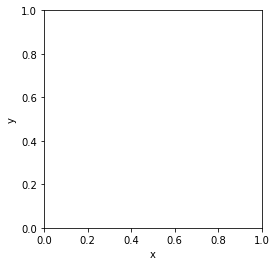

In [21]:

# Set up the figure
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

# Build the plot
a_range = [-4, 4]
b_range = [-4, 4]
ax = pp.plot_flow_field(ax, rhs, a_range, b_range,n_grid=100)
ax = pp.plot_nullcl(ax, rhs, [-2, 2], [-2, 2], args=(), n_grid=100)
for ii in np.arange(len(eqpnts)):   
    try:
        ax = pp.plot_fixed_points(ax, [eqpnts[ii][x],eqpnts[ii][y]] ,color='red')
    except:
        print('except, possibly complext root') 
    

            

ax = pp.plot_traj(ax, rhs, np.array([-1, -1]), np.linspace(0, -10, 50), color=np.array([0.5, 0.5, 0.5]), lw=2)
ax = pp.plot_traj(ax, rhs, np.array([-1, -1]), np.linspace(0, 10, 50), color='red', lw=2)

ax = pp.plot_traj(ax, rhs, np.array([-2, 2]), np.linspace(0, 10, 50), color='black', lw=2)


ax = pp.plot_traj(ax, rhs, np.array([-1, 2]), np.linspace(0, 10, 50), color='green', lw=2)

plt.xlim(a_range)
plt.ylim(b_range)